<a href="https://colab.research.google.com/github/yexf308/AppliedStatistics/blob/main/2_Multivariate_probability_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\def\c#1{\mathcal{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$

## Covariance
### Univariate random variable
The covariance between two **univariate** rv’s $X$ and $Y$ measures the degree to which $X$ and $Y$ are (linearly) related. 
\begin{align}
 \mr{cov}[X,Y] = \mb{E}\left[(X-\mb{E}[X])(Y-\mb{E}[Y])\right]=\mb{E}[XY]-\mb{E}[X]\mb{E}[Y]
\end{align}
The (Pearson) correlation coefficient between $X$ and $Y$ is defined as
\begin{align}
\rho = \mr{corr}[X,Y]=\frac{\mr{cov}[X,Y]}{\sqrt{\mb{V}[X]\mb{V}[Y]}}
\end{align}

Note $-1\le \rho\le 1$, why?
- $\rho = 1$ if and only if $Y=aX+b$ with $a>0$. 

- $\rho = -1$ if and only if $Y=aX+b$ with $a< 0$. 



**Property of correlation:**
- Uncorrelated does not imply independent. Why?


<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/Corr.png?raw=true" width="600" />

$\rho=0$ can have lots of possibilities. 


- Correlation does not imply causation. Why?
<img src="https://github.com/yexf308/AppliedStatistics/blob/main/image/Corr2.png?raw=true" width="600" />

- Simpson's paradox.
  Let's look at an example in college graduate admissions. Think about it.
   - In Law school: 
      - Male applicant: $\qquad$ 8/53, 15.1% admission rate.
      - Female applicant: $\quad$     51/152, $\color{red}{33.6}$% adimission rate.

   - In Business school: 
      - Male applicant: $\qquad$ 201/251, 80.1% admission rate. 
      - Female applicant: $\quad$ 92/101,  $\color{red}{91.1}$% admission rate.  

   - In total: 
      - Male applicant: $\qquad$ 209/304,  $\color{red}{68.8}$% admission rate. 
      - Female applicant: $\quad$ 143/253, 56.5% adimission rate. 


![dbscan_url](https://github.com/yexf308/AppliedStatistics/blob/main/image/Simpsons.gif?raw=true "dbscan")



---

### Multivariate random variable

If $\m{X}$ is a $D$-dimensional random vector, i.e.,
\begin{align}
\m{X}=\bcm X_1 \\ X_2\\ \vdots \\X_D \ecm
\end{align}
its covariance matrix is positive semi-definite matrix:
\begin{align}
\mr{cov}[\m{X}]&=\mb{E}\left[(\m{X}-\mb{E}[\m{X}])(\m{X}-\mb{E}[\m{X}])^\top\right] \\
&=\bcm \mb{V}[X_1] & \mr{cov}[X_1, X_2] & \dots & \mr{cov}[X_1, X_D] \\
\mr{cov}[X_2, X_1] & \mb{V}[X_2] & \dots & \mr{cov}[X_2, X_D] \\
\vdots & \vdots & \vdots & \vdots \\
\mr{cov}[X_D, X_1] & \mr{cov}[X_D, X_2] & \dots &  \mb{V}[X_D]
\ecm
\end{align}

- Why PSD? For an arbitrary real vector $\m{u}$, 
\begin{align}
\m{u}^\top \mr{cov}[\m{X}] \m{u} &= \mb{E}\left[\m{u}^\top(\m{X}-\mb{E}[\m{X}])(\m{X}-\mb{E}[\m{X}])^\top\m{u}\right] \\
&= \mb{E}[s^2] \ge 0
\end{align}
Note $s$ is a random variable in $\mb{R}$, i.e, $s= (\m{X}-\mb{E}[\m{X}])^\top\m{u}\in \mb{R} $ and $\mb{E}[s]=\mb{E}[(\m{X}-\mb{E}[\m{X}])^\top]\m{u}=0$
- The covariance of a linear transformation $\mr{cov}[A\m{X}+b]=A\mr{cov}[\m{X}]A^\top$. 

  - Proof: Denote $\m{Y}=A\m{X}+b$, 
  \begin{align}
  \mr{cov}[\m{Y}] &= \mb{E}\left[(\m{Y}-\mb{E}[\m{Y}])(\m{Y}-\mb{E}[\m{Y}])^\top\right] \\
  &= \mb{E}\left[(A\m{X}-A\mb{E}[\m{X}])(A\m{X}-A\mb{E}[\m{X}])^\top\right] \\
  &= A\mr{cov}[\m{X}]A^\top
  \end{align}


The **cross-covariance** between $\m{X}$ and $\m{Y}$ is 
\begin{align}
\mr{cov}[\m{X}, \m{Y}]=\mb{E}\left[(\m{X}-\mb{E}[\m{X}])(\m{Y}-\mb{E}[\m{Y}])^\top\right]
\end{align}

# Multivariate Gaussian (normal) distribution
The multivariate normal distribution (**MVN**) is a multidimensional generalisation of the one-dimensional normal distribution. 
The multivariate normal with dimensionality $D$ has a joint probability density given by:

$$
\c{N}(\m{x} \mid \mm{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^D |\Sigma|}} \exp{ \left( -\frac{1}{2}(\m{x} - \mm{\mu})^T \Sigma^{-1} (\m{x} - \mm{\mu}) \right)}
$$


Where $\m{x}$ a random vector of size $d$, $\mm{\mu}$ is the mean vector, $\Sigma=\mr{cov}(\m{x})$ is the (positive definite) covariance matrix (of size $D \times D$), and $|\Sigma|$ its determinant.

The normalization constant is $Z=(2\pi)^{D/2}|\Sigma|^{1/2}$. to ensure pdf integrates to 1. 

A full covariance matrix has $D(D+1)/2$ parameters. Other special covariance matrices are 
- diagonal covariance matrix: off-diagonal terms are 0. 

- spherical covariance matrix(isotropic covariance matrix): $\Sigma=\sigma^2 \m{I}_D$. 

More property:
-  If a random vector has a multivariate normal distribution then any two or more of its components that are uncorrelated are independent. 

-  It is **not** true that two random variables that are (separately, marginally) normally distributed and uncorrelated are independent. Why?

In [14]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

In [2]:
def multivariate_normal(x, D, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**D * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [3]:
# Plot bivariate distribution
def generate_surface(mean, covariance, D):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.array([x1[i,j], x2[i,j]]), 
                D, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

## Standard normal distribution
$$
\m{x}\sim\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)
$$


In [4]:
# independent normals
mu    = np.array([0.,0.])
sigma = np.array([[1.,0.],[0.,1.]])
D     = 2

x1, x2, p = generate_surface(
    mu, sigma, D)

In [5]:
from mpl_toolkits.mplot3d import Axes3D


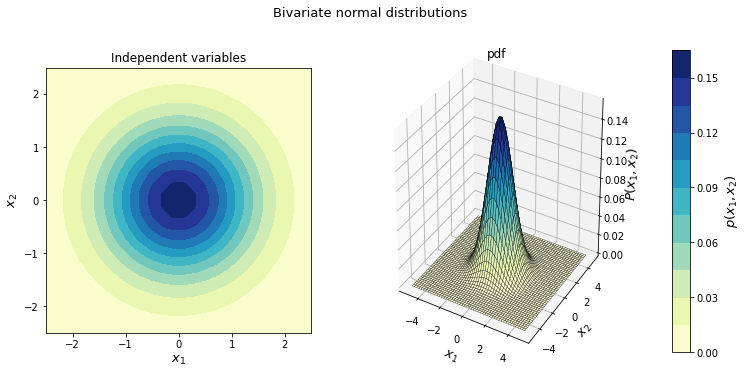

In [6]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
con = ax1.contourf(x1, x2, p, 10, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

ax2 = fig.add_subplot(122, projection='3d')
surface = ax2.plot_surface(x1, x2, p,
                              cmap=cm.YlGnBu,
                              linewidth=0.3, edgecolor='k')
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.set_zlabel("$P(x_1,x_2)$", fontsize=13)
ax2.set_title('pdf', fontsize=12)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)

plt.show()


## Correlated normal distribution
$$
\m{x}\sim\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix}, 
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$  

In [7]:
# correlated normals
mu    = np.array([0.,1.])
sigma = np.array([[1.,0.8],[0.8,1.]])
D     = 2

x1, x2, p = generate_surface(
    mu, sigma, D)

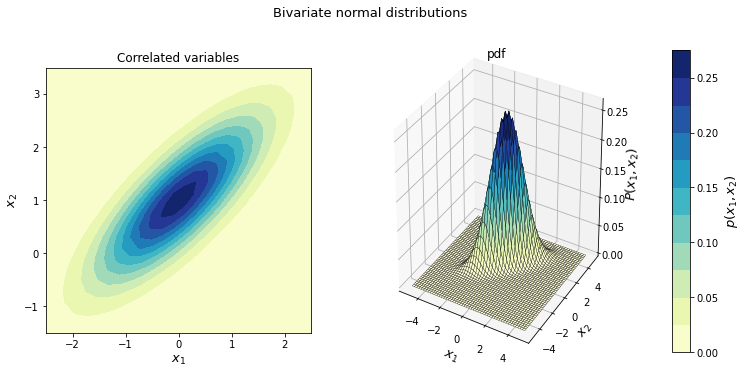

In [8]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
con = ax1.contourf(x1, x2, p, 10, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -1.5, 3.5])
ax1.set_aspect('equal')
ax1.set_title('Correlated variables', fontsize=12)

ax2 = fig.add_subplot(122, projection='3d')
surface = ax2.plot_surface(x1, x2, p,
                              cmap=cm.YlGnBu,
                              linewidth=0.3, edgecolor='k')
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.set_zlabel("$P(x_1,x_2)$", fontsize=13)
ax2.set_title('pdf', fontsize=12)


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()


## Affine transformation of multivariate normal
It is possible to transform a multivariate normal distribution into a new normal distribution with an affine transformation. More specifically if $\m{X}$ is normally distributed and $\m{Y} = A\m{X} + b$ with $A$ a linear transformation and $u$ a vector then $\m{Y}$ is also normally distributed with mean $\mu_{\m{Y}} = b + A\mu_{\m{X}}$ and covariance matrix $\Sigma_{\m{Y}} = A\Sigma_{\m{X}}A^\top$.

## Sampling from a multivariate normal

The previous formula helps us to [sample from any multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).  
To do this sampling we can sample $X$ from the standard normal distribution $X \sim \mathcal{N}(0, I_d)$, where the mean is the vector $\mu=0$ and the covariance is the identity matrix $\Sigma=I_d$. Sampling from this distribution is easier because each variable in $X$ is independent from all other variables, we can just sample each variable separately.

It is then possible to sample $Y$ from $\mathcal{N}(\mu_{Y}, \Sigma_{Y})$ by sampling $X$ and applying the affine transform on the samples. This transform is $Y = AX + u$ where we know from the previous section that the covariance of $Y$ will be $\Sigma_{Y} = A\Sigma_{X}A^\top$. Since $\Sigma_{X}=I_d$ we can write that $\Sigma_{Y} = A I_d A^\top = A A^\top$. $L$ can now be found by a technique called the Cholesky decompostion which does exactly the decomposition we need. The vector $u$ is then $\mu_{Y}$ since $\mu_{X}=0$ ($u = \mu_{Y} - L\mu_{X}$).

Lets try this out by sampling 500 samples from:

$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix} 0 \\ 
1 
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface below.



In [26]:

# Create A
A = np.linalg.cholesky(sigma)
print(A)
# Sample X from standard normal
n = 500  # Samples to draw
X = np.random.normal(size=(D, n))
# Apply the transformation
Y = ((A.dot(X)).T + mu).T

[[1.  0. ]
 [0.8 0.6]]


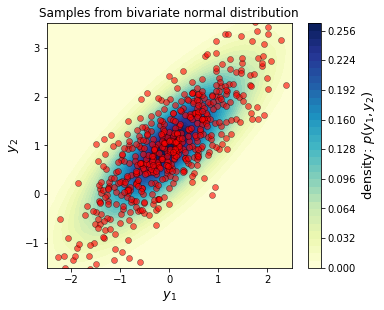

In [27]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mu, sigma, D)
con = ax.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()
#


# Marginal and Conditional normal distributions

If both $\m{x}$ and $\m{y}$ are jointly normal random vectors defined as:
$$
\m{z}=\begin{bmatrix}
\m{x} \\
\m{y} 
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
\mu_{\m{x}} \\
\mu_{\m{y}}
\end{bmatrix},
\begin{bmatrix}
A & C \\
C^T & B
\end{bmatrix}
\right)
= \mathcal{N}(\mu_{\m{z}}, \Sigma_{\m{z}})$$

### Marginal distribution
\begin{align}
\boxed{p(\m{x}) = \int \c{N}(\mu_{\m{z}}, \Sigma_{\m{z}}) d\m{y} = \c{N}(\m{x}|\mu_\m{x}, A)}\\
\boxed{p(\m{y}) = \int \c{N}(\mu_{\m{z}}, \Sigma_{\m{z}}) d\m{x} = \c{N}(\m{y}|\mu_\m{y}, B)}
\end{align}
### Conditional distribution
The conditional distribution of $\m{x}$ given $\m{y}$ is defined as

$$\boxed{p(\mathbf{x} | \mathbf{y}) = \mathcal{N}(\mu_{x|y}, \Sigma_{x|y})}$$

With:
\begin{align}
\boxed{\Sigma_{x|y}  = A - CB^{-1}C^\top \triangleq \tilde{A}^{-1}} \\
\boxed{\mu_{x|y}  = \mu_x + CB^{-1}(\mathbf{y}-\mu_y)}
\end{align}


With $A - CB^{-1}C^\top = \tilde{A}^{-1}$ the Schur complement] of B in $\Sigma$. The computation of the conditional covariance matrix $\Sigma_{x|y}$ can be viewed as inverting the covariance matrix $\Sigma^{-1} = \Lambda$, dropping the rows and columns corresponding to the variables $\mathbf{y}$ that are being conditioned upon (Selecting $\tilde{A}$), and inverting back to get the conditional covariance matrix $\Sigma_{x|y}=\tilde{A}^{-1}$.

The shift of the mean can be seen as getting the residual of the variable conditioned upon $(\mathbf{y}-\mu_y)$, normalising this with the covariance $B$ of the variable conditioned upon, and transforming it to the space of $\mathbf{x}$ by the covariances between $\mathbf{x}$ and $\mathbf{y}$ $(C)$.


# **WARNING!!**

Proof: 
- Define $\m{z}=\m{x}+H\m{y}$, where $H=-CB^{-1}$, then we have 
\begin{align}
\mr{cov}(\m{z},\m{y})&=\mr{cov}(\m{x},\m{y})+\mr{cov}(H\m{y},\m{y}) \\
&=C + H\mr{var}(y)=C+(-CB^{-1})B = 0
\end{align}
Therefore $\m{z}$ and $\m{y}$ are uncorrelated. Since they are jointly normal, they are independent. 

- $\mb{E}[\m{z}]= \mu_x+H\mu_y$, then
\begin{align}
\mb{E}[\m{x}|\m{y}]&=\mb{E}[\m{z}-H\m{y}|\m{y}] \\
&= \mb{E}[\m{z}|\m{y}] - \mb{E}[H\m{y}|\m{y}] \\
&= \mb{E}[\m{z}]-H\m{y} \leftarrow (\m{z} \text{ and } \m{y} \text{ are independent.} ) \\
&= \mu_x+H(\mu_y-y) = \mu_x +CB^{-1} (\m{y}-\mu_y) 
\end{align}

- For the covariance matrix, 
\begin{align}
\mr{var}(\m{x}|\m{y})&=\mr{var}(\m{z}-H\m{y}|\m{y}) \\
&= \mr{var}(\m{z}|\m{y}) - \mr{var}(H\m{y}|\m{y}) \leftarrow (\m{z} \text{ and } \m{y} \text{ are independent.} ) \\
&= \mr{var}(\m{z}|\m{y}) =\mr{var}(\m{z})\\
&= \mr{var}(\m{x}+H\m{y}) \\
&= \mr{var}(\m{x}) + H\mr{var}(\m{y})H^\top + \mr{cov}(\m{x},\m{y})H^\top+ H\mr{cov}(\m{y},\m{x}) \\
&= A+CB^{-1}BB^{-1}C^\top - 2CB^{-1}C^\top =A-CB^{-1}C^\top
\end{align}

## Code for Marginal distribution

In [21]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [9]:

# Get the mean values from the vector
mean_x = mu[0]
mean_y = mu[1]
# Get the blocks (single values in this case) from 
#  the covariance matrix
A = sigma[0, 0]
B = sigma[1, 1]
C = sigma[0, 1]  # = C transpose in this case

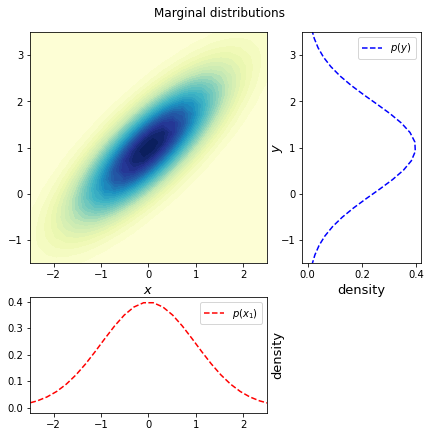

In [16]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mu, sigma, D)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 33, cmap=cm.YlGnBu)
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=50)
py = univariate_normal(y, mean_y, A)
# Plot univariate distribution
ax2.plot(py, y, 'b--', label=f'$p(y)$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=50)
px = univariate_normal(x, mean_x, B)
# Plot univariate distribution
ax3.plot(x, px, 'r--', label=f'$p(x_1)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)
plt.show()

## Code for Conditional distribution

In [17]:
# Calculate x|y
y_condition = 1.  # To condition on y
mean_xgiveny = mean_x + (C * (1/B) * (y_condition - mean_y))
cov_xgiveny = A - C * (1/B) * C

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx = mean_y + (C * (1/A) * (x_condition - mean_x))
cov_ygivenx = B - (C * (1/A) * C)

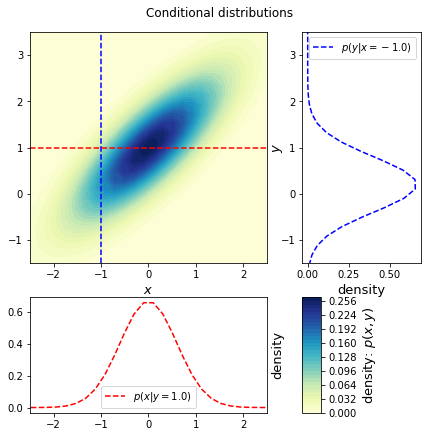

In [22]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Conditional distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mu, sigma, D)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 33, cmap=cm.YlGnBu)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], 'r--')
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-1.5, 3.5], 'b--')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=50)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, 'b--', 
         label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=50)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, 'r--', 
         label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, y)$', fontsize=13)
plt.show()
#